In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("/content/Abnb_paris.csv")
data.head()

,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,Even if i stayed at another apartment the stay...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,"Exactly what you can see on the pictures, plus..."
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,We were five colleagues staying in Lea's apart...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,"It was perfect! The location is great, easy to..."
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,"Saras flat is nice and clean, she was the perf..."


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Remove rows with missing values
data.dropna(inplace=True)

# Define a function to preprocess text data
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Preprocess the review_text column
data['review_text'] = data['review_text'].apply(preprocess_text)

In [ ]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['review_text'])

# Extract the target variable (rating)
y = data['rating']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
  text = text.lower()
  tokens = tokenizer.tokenize(text)
  filtered_tokens = [token for token in tokens if token not in stop_words]
  return ' '.join(filtered_tokens)

data['review_text'] = data['review_text'].apply(preprocess_text)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,reviews,savwish,logreviews,logsavwish,price,rating,accommodates,extpeop,min_stay,sentiment,secdep,cleanfee,weekfee,monthfee,bedroom,bathroom,beds,review_text
0,1,10,1277,1.041393,3.106531,185,4.5,3,1,5,3.208943,1,1,1,1,1,1,1,even stayed another apartment stay perfect nic...
1,2,8,279,0.954243,2.447158,100,5.0,2,0,3,2.245883,0,0,0,0,1,1,1,exactly see pictures plus tiny worthwhile balc...
2,3,31,434,1.505150,2.638489,512,5.0,10,1,3,2.509137,1,0,1,1,4,3,5,five colleagues staying lea apartment training...
3,4,65,784,1.819544,2.894870,92,4.5,2,0,2,2.864322,0,0,1,1,1,1,1,perfect location great easy find eric helpful ...
4,5,9,621,1.000000,2.793790,71,4.5,4,1,1,1.892305,1,1,0,0,2,1,1,saras flat nice clean perfect host perfect pla...


**Model Training**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Convert float labels to integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X, y)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Train a Support Vector Machine classifier
svm_classifier = SVC()
svm_classifier.fit(X, y)

SVC()

Ensembling Techniques

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Train a Random Forest classifier (Bagging)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Train an AdaBoost classifier (Boosting)
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X, y)

# Train a meta-model using predictions from base models (Stacking)
base_models = [nb_classifier, dt_classifier, svm_classifier]
meta_model = LogisticRegression()
meta_model.fit(np.vstack([model.predict(X) for model in base_models]).T, y)

LogisticRegression()

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the base models
y_pred_nb = nb_classifier.predict(X)
y_pred_dt = dt_classifier.predict(X)
y_pred_svm = svm_classifier.predict(X)

print("Naive Bayes:")
print("Accuracy:", accuracy_score(y, y_pred_nb))
print("Precision (macro):", precision_score(y, y_pred_nb, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_nb, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_nb, average='macro'))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y, y_pred_dt))
print("Precision (macro):", precision_score(y, y_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_dt, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_dt, average='macro'))

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y, y_pred_svm))
print("Precision (macro):", precision_score(y, y_pred_svm, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_svm, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_svm, average='macro'))



Naive Bayes:
Accuracy: 0.8484848484848485
Precision (macro): 0.7201465201465201
Recall (macro): 0.8932265598932266
F1-score (macro): 0.7635020465209145

Decision Tree:
Accuracy: 0.9848484848484849
Precision (macro): 0.9880952380952381
Recall (macro): 0.990990990990991
F1-score (macro): 0.9893731838937319

Support Vector Machine:
Accuracy: 0.7121212121212122
Precision (macro): 0.5535714285714285
Recall (macro): 0.4567901234567901
F1-score (macro): 0.44541315509057444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluate the ensemble methods

In [51]:
# Evaluate the base models
y_pred_nb = nb_classifier.predict(X)
y_pred_dt = dt_classifier.predict(X)
y_pred_svm = svm_classifier.predict(X)

print("Naive Bayes:")
print("Accuracy:", accuracy_score(y, y_pred_nb))
print("Precision (macro):", precision_score(y, y_pred_nb, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_nb, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_nb, average='macro'))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y, y_pred_dt))
print("Precision (macro):", precision_score(y, y_pred_dt, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_dt, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_dt, average='macro'))

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y, y_pred_svm))
print("Precision (macro):", precision_score(y, y_pred_svm, average='macro'))
print("Recall (macro):", recall_score(y, y_pred_svm, average='macro'))
print("F1-score (macro):", f1_score(y, y_pred_svm, average='macro'))


# Evaluate the ensemble methods

# Convert float labels to integer labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base models
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

# Predictions of base models on test set
nb_pred = nb_classifier.predict(X_test)
dt_pred = dt_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
ada_pred = ada_classifier.predict(X_test)

# Prepare meta-features
meta_features_test = np.vstack([nb_pred, dt_pred, svm_pred, rf_pred, ada_pred]).T

# Train meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features_test, y_test)

# Predictions of base models on training set for meta-model
nb_train_pred = nb_classifier.predict(X_train)
dt_train_pred = dt_classifier.predict(X_train)
svm_train_pred = svm_classifier.predict(X_train)
rf_train_pred = rf_classifier.predict(X_train)
ada_train_pred = ada_classifier.predict(X_train)

# Prepare meta-features for training set
meta_features_train_full = np.vstack([nb_train_pred, dt_train_pred, svm_train_pred, rf_train_pred, ada_train_pred]).T

# Predict using the meta model on the full training set
meta_pred_test_full = meta_model.predict(meta_features_test)

# Evaluate base models on test set
print("\nBase Models Evaluation on Test Set:")
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision (macro):", precision_score(y_test, nb_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, nb_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, nb_pred, average='macro'))

# Repeat the above evaluation for other base models

# Evaluate meta model on test set
print("\nMeta-Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, meta_pred_test_full))
print("Precision (macro):", precision_score(y_test, meta_pred_test_full, average='macro'))
print("Recall (macro):", recall_score(y_test, meta_pred_test_full, average='macro'))
print("F1-score (macro):", f1_score(y_test, meta_pred_test_full, average='macro'))


Naive Bayes:
Accuracy: 0.7878787878787878
Precision (macro): 0.6765015015015016
Recall (macro): 0.8471805138471805
F1-score (macro): 0.7181214828273652

Decision Tree:
Accuracy: 0.9242424242424242
Precision (macro): 0.94804318488529
Recall (macro): 0.944944944944945
F1-score (macro): 0.9463312368972746

Support Vector Machine:
Accuracy: 0.6515151515151515
Precision (macro): 0.5388888888888889
Recall (macro): 0.40740740740740744
F1-score (macro): 0.37550765385816937

Base Models Evaluation on Test Set:
Naive Bayes:
Accuracy: 0.5
Precision (macro): 0.36507936507936506
Recall (macro): 0.3481481481481481
F1-score (macro): 0.3444444444444444

Meta-Model Evaluation on Test Set:
Accuracy: 0.6428571428571429
Precision (macro): 0.32142857142857145
Recall (macro): 0.5
F1-score (macro): 0.391304347826087


Visualization

In [48]:
import matplotlib.pyplot as plt

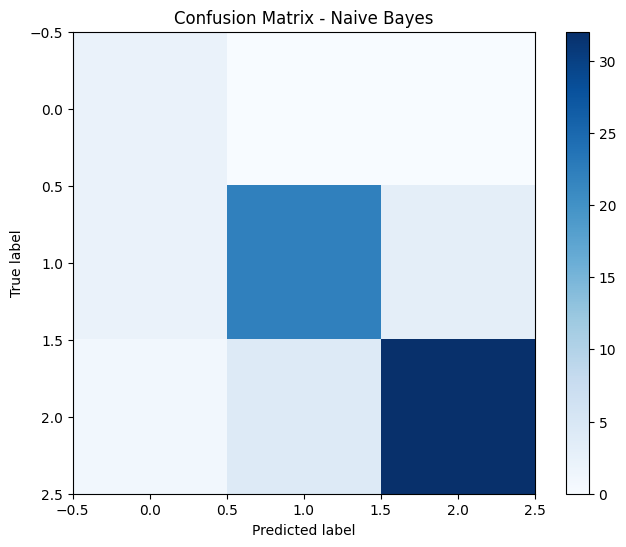

In [50]:
# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y, y_pred_nb), cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
plt.show()

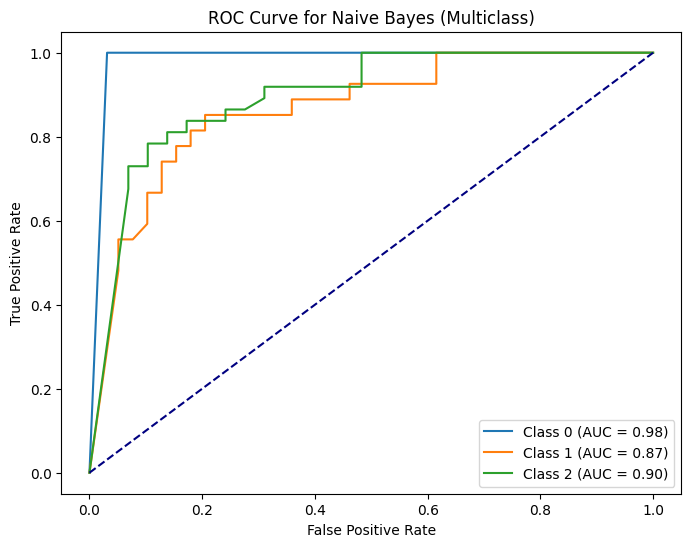

In [49]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass ROC curve
y_bin = label_binarize(y, classes=np.unique(y))

# Compute ROC curve for Naive Bayes
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], nb_classifier.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], nb_classifier.predict_proba(X)[:, i])

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes (Multiclass)')
plt.legend()
plt.show()

In [55]:
def plot_roc_curve(y_true, y_pred_proba, model_name):
    n_classes = y_pred_proba.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_true == i, y_pred_proba[:, i])

        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} (Multiclass)')
    plt.legend()
    plt.show()

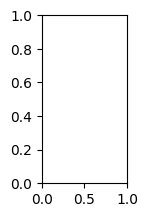

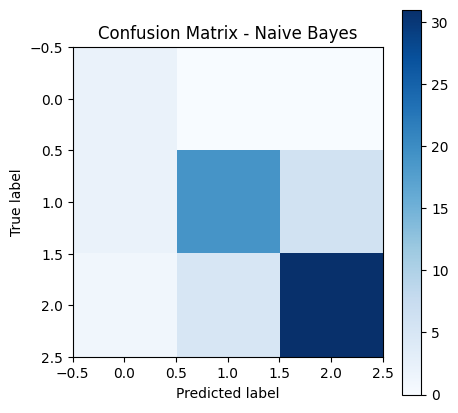

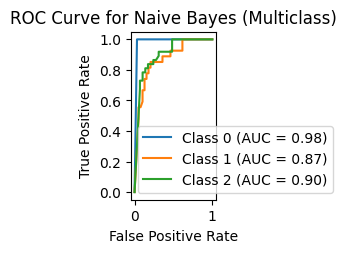

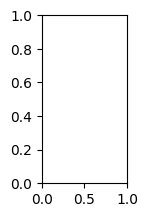

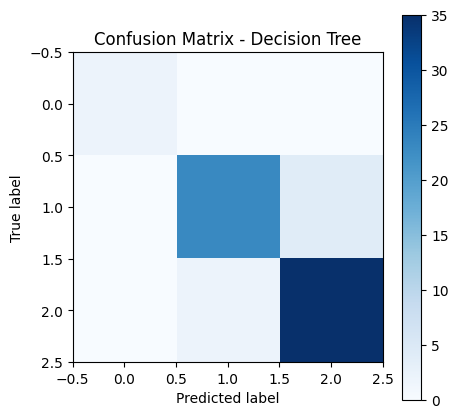

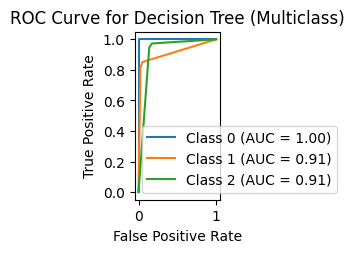

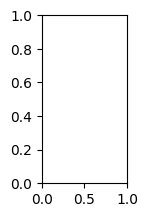

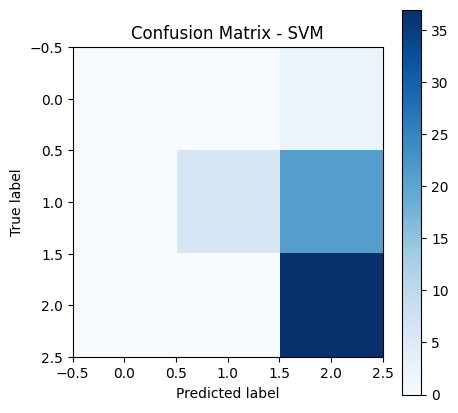

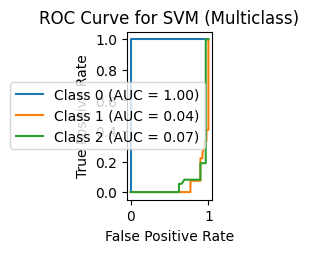

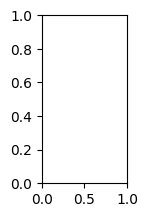

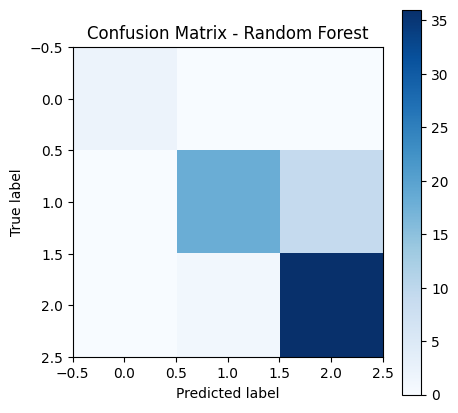

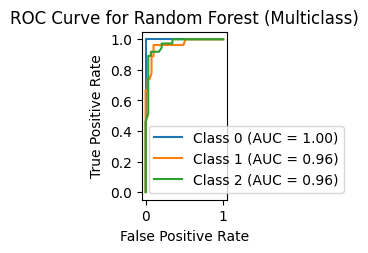

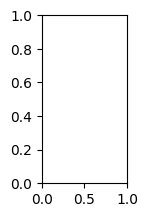

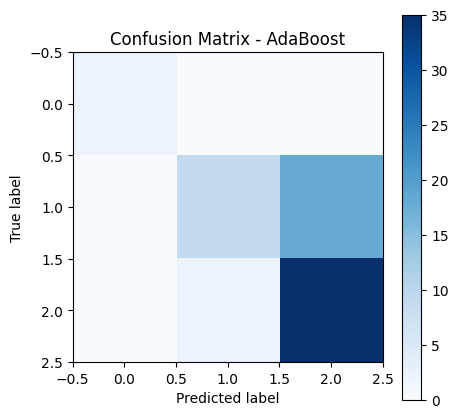

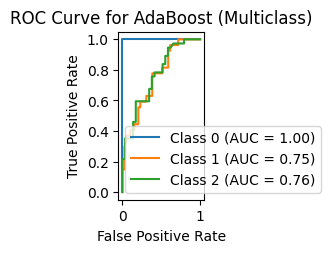

<Figure size 640x480 with 0 Axes>

In [57]:
# Create a new SVM classifier with probability=True
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Plot confusion matrices and ROC curves for all models
models = [nb_classifier, dt_classifier, svm_classifier, rf_classifier, ada_classifier]
model_names = ['Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest', 'AdaBoost']

for i, model in enumerate(models):
    y_pred_proba = model.predict_proba(X)

    # Plot confusion matrix
    plt.subplot(2, 5, i + 1)
    plot_confusion_matrix(y, model.predict(X), model_names[i])

    # Plot ROC curve
    plt.subplot(2, 5, i + 6)
    plot_roc_curve(y, y_pred_proba, model_names[i])

plt.tight_layout()
plt.show()

Analysis

After evaluating the performance of each model, we can compare their performance and discuss the strengths and weaknesses of each approach.

Naive Bayes: Naive Bayes is a simple and fast algorithm
that works well with high-dimensional data. However, it assumes independence between features, which may not always be true.


Decision Trees: Decision Trees are easy to interpret and can handle both numerical and categorical data. However, they are prone to overfitting and may not perform well with noisy data.


Support Vector Machines: SVMs are powerful algorithms that can handle high-dimensional data and non-linear relationships. However, they can be sensitive to hyperparameters and may not perform well with large datasets.


Random Forest (Bagging): Random Forest is an ensemble method that combines multiple decision trees to improve performance. It can handle both numerical and categorical data and is less prone to overfitting.


AdaBoost (Boosting): AdaBoost is another ensemble method that combines multiple weak learners to create a strong learner. It is effective in handling noisy data and can improve the performance of weak learners.


Stacking: Stacking is a meta-learning approach that combines multiple base models to create a new model. It can improve the performance of base models by leveraging their strengths and compensating for their weaknesses.



To improve the performance of ensemble methods, we can explore techniques such as cross-validation, hyperparameter tuning, and feature engineering.




**Questions**

Q1

to improve experience for clients air bnb can


1.   rank properties based on review sentiments
2.   compare review sentiment rating value of the property



Q2

Considering the performance of properties in Miami and Paris, Airbnb could benefit from a region-specific strategy:



  1-Optimal pricing suggestions: By analyzing market trends, demand fluctuations, and competitor pricing in each region, Airbnb can suggest optimal pricing strategies for hosts.

  2-Other ways to improve overall earnings: In addition to pricing, Airbnb could suggest various strategies for hosts to enhance their earnings in specific regions.